In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from census import Census
from us import states

# Census API Key
c = Census("795bafa9753ca592c49f15a987d5e11aa70bf73e", year=2016)

In [2]:
csv_path = os.path.join('..', 'data', 'Zip_Zhvi_2bedroom.csv')
df_2bed = pd.read_csv(csv_path)
csv_path2 = os.path.join('..', 'data', 'Zip_Zhvi_3bedroom.csv')
df_3bed = pd.read_csv(csv_path2)

In [3]:
df_2a = df_2bed[["RegionName", 'City', 'State'
, 'CountyName'
,'2017-11']]
df2 = df_2a[np.isfinite(df_2a['2017-11'])]
df2['2017-11'] = df2['2017-11'].apply(np.int32)
df2 = df2.rename(columns={'RegionName': 'Zipcode', '2017-11' : 'Bedroom Price'})
df2['Zipcode'] = df2['Zipcode'].astype(str).str.zfill(5)
df2.head()


C:\Users\JenChen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Zipcode,City,State,CountyName,Bedroom Price
0,10025,New York,NY,New York,1469200
1,60657,Chicago,IL,Cook,378200
2,10023,New York,NY,New York,1968600
3,60614,Chicago,IL,Cook,405900
4,79936,El Paso,TX,El Paso,84300


In [4]:
df_3a = df_3bed[["RegionName", 'City', 'State'
, 'CountyName'
,'2017-11']]
df3 = df_3a[np.isfinite(df_3a['2017-11'])]
# df3['2017-11'] = df3['2017-11'].apply(np.int32)
df3 = df3.rename(columns={'RegionName': 'Zipcode', '2017-11' : 'Bedroom Price'})
df3['Zipcode'] = df3['Zipcode'].astype(str).str.zfill(5)
df3.head()

,Zipcode,City,State,CountyName,Bedroom Price
0,60657,Chicago,IL,Cook,567300
1,60614,Chicago,IL,Cook,628700
2,79936,El Paso,TX,El Paso,111700
3,60640,Chicago,IL,Cook,375200
4,77084,Houston,TX,Harris,151400


In [5]:
# Run Census Search to retrieve data on all zip codes (2016 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("B19013_001E", "B01003_001E" ), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B19013_001E": "Median Household Income", 
                                      "B01003_001E": "Population", 
                                      "zip code tabulation area": "Zipcode"})

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population","Median Household Income"]]
census_pd["Zipcode"] = census_pd["Zipcode"].astype(str).str.zfill(5)

# Visualize
print(len(census_pd))
census_pd.head()

# Save the census Data Frame as a csv
census_pd.to_csv("census_data.csv", encoding="utf-8", index=False)
census_pd.head()

33120


,Zipcode,Population,Median Household Income
0,01001,17423.0,56714.0
1,01002,29970.0,48923.0
2,01003,11296.0,2499.0
3,01005,5228.0,70568.0
4,01007,14888.0,80502.0


In [13]:
census_pd_2bedroom = pd.merge(df2, census_pd, on = 'Zipcode', how = 'left')
census_pd_2bedroom.to_csv("census_data_2bedroom.csv", encoding="utf-8", index=False)
census_pd_2br_inc_75kup = census_pd_2bedroom[census_pd_2bedroom['Median Household Income']>75000]
census_pd_2br_inc_75kup.head()

,Zipcode,City,State,CountyName,Bedroom Price,Population,Median Household Income
0,10025,New York,NY,New York,1469200,94717.0,80025.0
1,60657,Chicago,IL,Cook,378200,70105.0,84319.0
2,10023,New York,NY,New York,1968600,60307.0,115080.0
3,60614,Chicago,IL,Cook,405900,69817.0,94640.0
7,77494,Cinco Ranch,TX,Fort Bend,233700,97515.0,137231.0


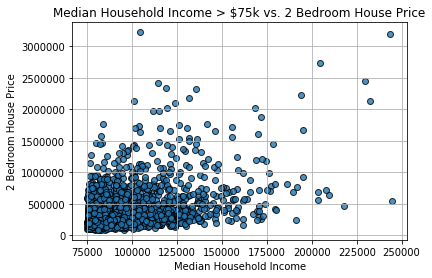

In [16]:
# Build a scatter plot with 2 bedroom house prices and Median Household Income greater than $75k
plt.scatter(census_pd_2br_inc_75kup["Median Household Income"].astype(int), 
            census_pd_2br_inc_75kup["Bedroom Price"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("Median Household Income > $75k vs. 2 Bedroom House Price")
plt.ylabel("2 Bedroom House Price")
plt.xlabel("Median Household Income")
plt.grid(True)

# Save the figure
plt.savefig("MedianIncome75kup_2bedroom.png")

# Show plot
plt.show()

In [15]:
census_pd_3bedroom = pd.merge(df3, census_pd, on = 'Zipcode', how = 'left')
census_pd_3bedroom.to_csv("census_data_3bedroom.csv", encoding="utf-8", index=False)
census_pd_3br_inc_75kup = census_pd_3bedroom[census_pd_3bedroom['Median Household Income']>75000]
census_pd_3br_inc_75kup.head()

,Zipcode,City,State,CountyName,Bedroom Price,Population,Median Household Income
0,60657,Chicago,IL,Cook,567300,70105.0,84319.0
1,60614,Chicago,IL,Cook,628700,69817.0,94640.0
6,75070,McKinney,TX,Collin,281100,88939.0,96322.0
22,78660,Pflugerville,TX,Travis,209200,81698.0,78145.0
24,20009,Washington,DC,District of Columbia,899600,51508.0,97563.0


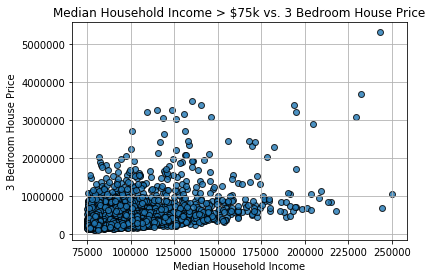

In [17]:
# Build a scatter plot using 3 bedroom house prices and Median Household Income greater than $75k
plt.scatter(census_pd_3br_inc_75kup["Median Household Income"].astype(int), 
            census_pd_3br_inc_75kup["Bedroom Price"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("Median Household Income > $75k vs. 3 Bedroom House Price")
plt.ylabel("3 Bedroom House Price")
plt.xlabel("Median Household Income")
plt.grid(True)

# Save the figure
plt.savefig("MedianIncome75kup_3bedroom.png")

# Show plot
plt.show()